In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score

# Set the default figure size of matplotlib
plt.rcParams["figure.figsize"] = (6,5)

# 1. Load and Study the overall Dataset
We will load the data in the following sections and then check the summary statistics of the data. This will give us a good understanding of what is there in the sample data.

In [6]:
# load the data
insurance_df = pd.read_csv("Medical_insurance.csv")

# CHeck the first 5 rows
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_df["sex"].map({"male":0,"female":1})

,sex
0,1
1,0
2,0
3,0
4,0
...,...
2767,1
2768,1
2769,0
2770,0


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# CHeck the last 5 rows
insurance_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [10]:
# the dataframe column at a glance
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [11]:
# The statistics of the numerical columns in the dataset
insurance_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Insights:
1. The dataset is clean, with no columns/features and labels having blank values. The  cleaning is a major step but here it can be considered that the raw data was worked upon and cleaned to enable analytics, data viz and predictive modeling on it.
2. The charges column is the cost of medical insurance and this is to considered as the target/label/response variable for our predictive model.
3. All the other columns can be considered as features/predictors.

# 2. Exploratory Data Analysis
In this section of the analysis we will explore the relation between our target (i.e. charges) and all other features and try to understand which features might be impacting the charges (i.e. cost of medical insurance) and to what extent, whether we have a clear indication of which feature hsa the most visible impact.

So, we will create the below plots to study the features.


1. Distribution of Insurance Charges with Age and Smoker status
2. Distribution of Insurance Charges with Smoker Status and Regions
3. Distribution of Insurance Charges with Body Mass Index and Smoker Status
4. Distribution of Insurance Charges with Gender and Smoker Status
5. Distribution of Insurance Charges with the Number of Children


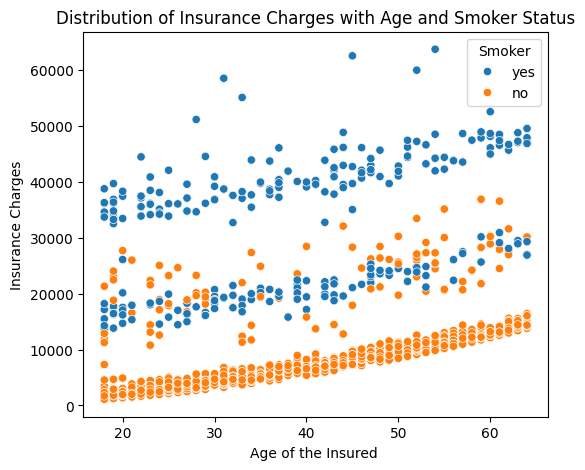

In [12]:
# Distribution of Insurance Charges with Age and Smoker status
sns.scatterplot(x='age',
               y= "charges",
               data= insurance_df,
               hue="smoker")
plt.legend(title= "Smoker")
plt.xlabel("Age of the Insured ")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Age and Smoker Status")
plt.savefig("../plot_charges_age.png")


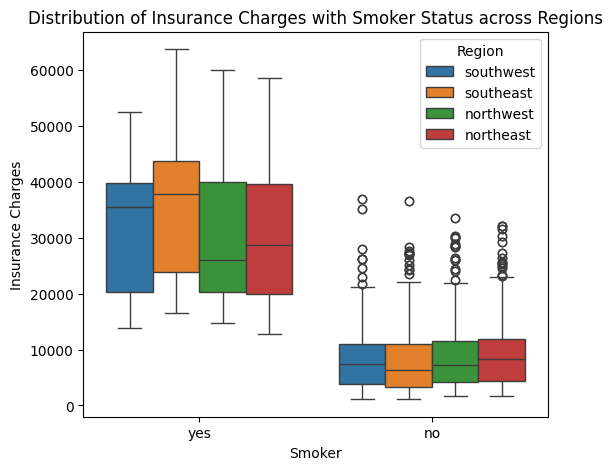

In [13]:
# Distribution of Insurance Charges with Smoker Status across Regions
sns.boxplot(data=insurance_df,
            x="smoker",
            y="charges",
            hue="region")
plt.legend(title="Region")
plt.xlabel("Smoker")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Smoker Status across Regions")
plt.savefig("../plot_charges_smoker.png")

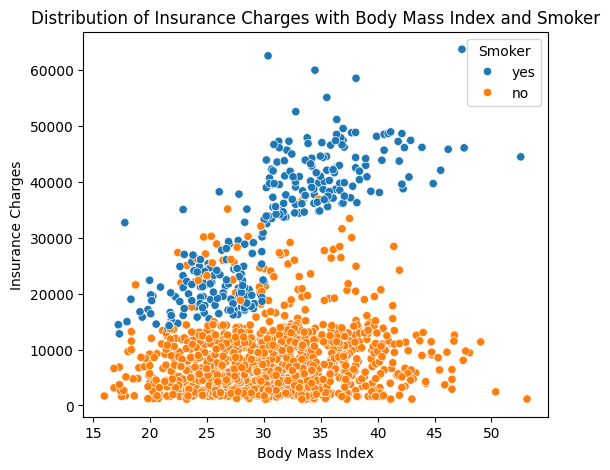

In [14]:
# Distribution of Insurance Charges with Body Mass Index and Smoker Status
sns.scatterplot(data=insurance_df,
                x="bmi",
                y="charges",
                hue="smoker")
plt.legend(title="Smoker")
plt.xlabel("Body Mass Index")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Body Mass Index and Smoker")
plt.savefig("../plot_charges_bmi.png")

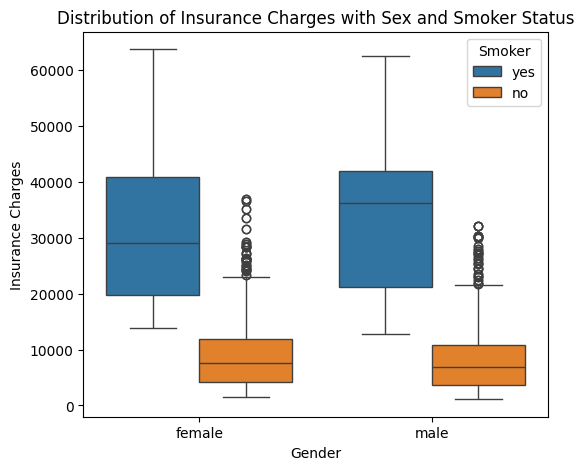

In [15]:
# Distribution of Insurance Charges with Gender and Smoker Status
sns.boxplot(data=insurance_df,
            x="sex",
            y="charges",
            hue="smoker")
plt.legend(title="Smoker")
plt.xlabel("Gender")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with Sex and Smoker Status")
plt.savefig("../plot_charges_gender.png")

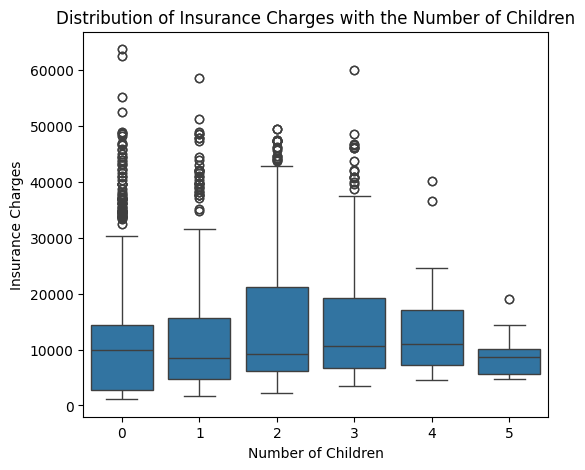

In [16]:
# Distribution of Insurance Charges with the Number of the Children
sns.boxplot(data=insurance_df,
            x="children",
            y="charges")
plt.xlabel("Number of Children")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges with the Number of Children")
plt.savefig("../plot_charges_children.png")

# 3. Predictive Modelling
after having some understanding of the features, the below sections will make a deep dive into 2 prediction algorithms (Linear Regression and Decision Tree Regressor). We will

1. firstly split the dataset into training set and test data with a 80% - 20% split
2. fit a Linear Regression Model with the training dataset
3. Use this Linear Regression Model to predict the cost of insurance for the test dataset
4. calculate the evaulation metric - i.e. Root Mean Squared Error (RMSE)

We will do the same above steps for the Decision Tree Regression Model also and finally visualize the feature importance as found out by the models. That will give us greater insights into what the predictive models think on which features impact the cost of insurance.

In [17]:
# split the dataset to train and test with a 80% - 20% ratio
np.random.seed(42)
def split_train_test(data_frame: pd.DataFrame,test_ratio:float) -> (pd.DataFrame, pd.DataFrame):
    shuffled_indices = np.random.permutation(len(data_frame))
    print(shuffled_indices)
    test_set_size = int(len(data_frame) * test_ratio)
    print(test_set_size)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    print(test_indices)
    return data_frame.iloc[train_indices],data_frame.iloc[test_indices]

train_insurance_df, test_insurance_df = split_train_test(data_frame= insurance_df,test_ratio= 0.2)

print(f"train = {len(train_insurance_df)}, test = {len(test_insurance_df)}")



[1106 1321 2313 ... 1130 1294  860]
554
[1106 1321 2313 2274 1432 2240  965 2626 2134 2296 1954 1228 1897 1859
 2683 1457  387  527 1956 1912 2650 1963  411  175 1093  610  410 2138
 1741 2759  651 1220  581 2669  443  903 1962 1114 1486 2690  141 1614
  978  817 2285  543 1738 1640  761 1731 2709 1293  564  572 1374  233
 2226 2283  785 1977  554 1783 2366 2703 2540  486   32 2672   67 2351
  450  211  196 2187 1475  964 1873 1366 1487  867 2714 2078  599  354
 1317 2339 1178 2521 1241 1041   30 1073 1380  296  700 1364 1509 2222
 1014  178  821  783 2372  999  869 1299  927 1817 2251 1451   73 1389
 1344 1000  365 1650 2132  605 1251  685 1927 1094 1096 1033 2058 1565
 1103 2574   80 2514 1677  764 1037 2478 2509 1728  479 2020  439 1739
 1662  309 1195 2557 1229  932 2060 2675   44  841 1455 1412 2497 1621
 1274 2086 2758   93 1656 1937  194 2459 1071 2727 2147 1222 1993  282
  528  457 2211  839 2176 1861 2005  407 2474 2127 2193  420 2097 2606
 1419  408 1807 1080   70  298  567  

In [18]:
# transforming categorical columns into numeric ones
def transform_cat_to_numeric(input_df: pd.DataFrame) -> pd.DataFrame:
    input_df["sex"] = input_df["sex"].map({"male":0,"female":1})
    input_df["region"] = input_df["region"].map({"southeast":0,
                                                "northeast":1,
                                                "southwest": 2,
                                                "northwest": 3})
    input_df["smoker"] = input_df["smoker"].map({"yes":1,"no":0})
    return input_df

train_insurance_df = transform_cat_to_numeric(input_df=train_insurance_df)
test_insurance_df = transform_cat_to_numeric(input_df=test_insurance_df)
print(train_insurance_df)


      age  sex     bmi  children  smoker  region      charges
315    52    0  33.250         0       0       1   9722.76950
1864   21    0  36.850         0       0       0   1534.30450
1997   38    1  34.800         2       0       2   6571.54400
1336   21    1  25.800         0       0       2   2007.94500
655    52    1  25.300         2       1       0  24667.41900
...   ...  ...     ...       ...     ...     ...          ...
1638   54    0  34.210         2       1       0  44260.74990
1095   18    1  31.350         4       0       1   4561.18850
1130   39    1  23.870         5       0       0   8582.30230
1294   58    0  25.175         0       0       1  11931.12525
860    37    1  47.600         2       1       2  46113.51100

[2218 rows x 7 columns]


In [19]:
# create the x, y components of both the training set and test set
features = ["age", "sex", "bmi", "children", "smoker", "region"]
target = ["charges"]

X_train_insurance_df = train_insurance_df.loc[:,features]
y_train_insurance_df = train_insurance_df.loc[:,target]


X_test_insurance_df = test_insurance_df.loc[:,features]
y_test_insurance_df = test_insurance_df.loc[:,target]
print(X_train_insurance_df)

      age  sex     bmi  children  smoker  region
315    52    0  33.250         0       0       1
1864   21    0  36.850         0       0       0
1997   38    1  34.800         2       0       2
1336   21    1  25.800         0       0       2
655    52    1  25.300         2       1       0
...   ...  ...     ...       ...     ...     ...
1638   54    0  34.210         2       1       0
1095   18    1  31.350         4       0       1
1130   39    1  23.870         5       0       0
1294   58    0  25.175         0       0       1
860    37    1  47.600         2       1       2

[2218 rows x 6 columns]


## Linear Regression

In [20]:
# Linear regression model
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train_insurance_df,y_train_insurance_df)


LinearRegression()

In [21]:
# find the predictons from the linear regression model for the test data
linear_predictions_df = pd.DataFrame(linear_reg_model.predict(X_test_insurance_df),
                                     columns=["predicted_charges"])
print(linear_predictions_df)

     predicted_charges
0         10310.866743
1         36211.799578
2          9628.720838
3          6223.840198
4          5791.729161
..                 ...
549       26193.550117
550        9661.885563
551        6563.554873
552       28914.540890
553        8677.617180

[554 rows x 1 columns]


In [22]:
# create the final data frame with actual and predicted charges
def create_final_df(in_x_test_df: pd.DataFrame,
                    in_y_test_df: pd.DataFrame,
                    pred_df: pd.DataFrame) -> pd.DataFrame:

    final_predicted_df = pd.concat([in_x_test_df.reset_index(drop=True),
                                           in_y_test_df.reset_index(drop=True),
                                           pred_df], axis=1)

    # reverse transform the categorical columns
    final_predicted_df["sex"] = final_predicted_df["sex"].map({0: "male", 1: "female"})
    final_predicted_df["region"] = final_predicted_df["region"].map({0: "southeast",
                                                                     1: "northeast",
                                                                     2: "southwest",
                                                                     3: "northwest"})
    final_predicted_df["smoker"] = final_predicted_df["smoker"].map({1: "yes",
                                                                     0: "no"})

    # final predicted values
    return final_predicted_df



final_linear_predicted_df = create_final_df(in_x_test_df=X_test_insurance_df,
                                            in_y_test_df=y_test_insurance_df,
                                            pred_df=linear_predictions_df)

# final predicted values
final_linear_predicted_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,49,female,29.925,0,no,northwest,8988.15875,10310.866743
1,62,male,26.695,0,yes,northeast,28101.33305,36211.799578
2,57,female,20.100,1,no,southwest,12032.32600,9628.720838
3,22,male,39.500,0,no,southwest,1682.59700,6223.840198
4,18,female,38.665,2,no,northeast,3393.35635,5791.729161
...,...,...,...,...,...,...,...,...
549,19,male,29.070,0,yes,northwest,17352.68030,26193.550117
550,26,male,46.530,1,no,southeast,2927.06470,9661.885563
551,41,male,23.940,1,no,northeast,6858.47960,6563.554873
552,27,female,31.400,0,yes,southwest,34838.87300,28914.540890


In [23]:
# Calculate RMSE and R2 score for Linear regression model
linear_mse = mean_squared_error(final_linear_predicted_df["charges"],
                                final_linear_predicted_df["predicted_charges"])

linear_rmse = round(float(np.sqrt(linear_mse)), 2)


print(f"The RMSE for the Linear Regression is {linear_rmse}")
print(f"R2 score: {r2_score(final_linear_predicted_df['charges'],final_linear_predicted_df['predicted_charges'])}")

The RMSE for the Linear Regression is 6335.82
R2 score: 0.7388938078746705


   features  linear_coeffs
4    smoker   23875.032685
3  children     449.205227
2       bmi     311.712336
0       age     255.411893
5    region     112.072579
1       sex      63.478462


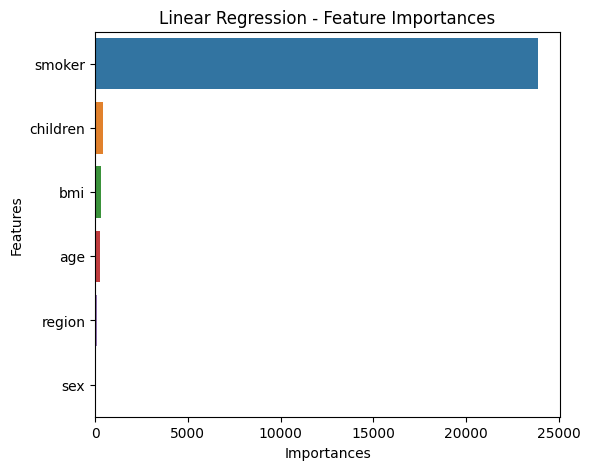

In [24]:
# Get Feature Importances for Linear Regression

# Get coefficients and transpose
linear_coeffs = np.transpose(linear_reg_model.coef_)
# print(linear_coeffs)

#
features = np.transpose(np.array([["age", "sex", "bmi", "children", "smoker", "region"]]))
# print(features)

# concatenating coefficients and features and sorting in descending order
feature_importances_linear_df = pd.concat([pd.DataFrame(features,
                                                        columns=["features"]).reset_index(drop=True),
                                           pd.DataFrame(linear_coeffs,
                                                        columns=["linear_coeffs"]).reset_index(drop=True)],
                                          axis=1).sort_values(["linear_coeffs"], ascending=False)
print(feature_importances_linear_df)



# Bar Plot

sns.barplot(data=feature_importances_linear_df,
            x="linear_coeffs",
            y="features",
            hue="features",
           dodge=False)

plt.xlabel("Importances")
plt.ylabel("Features")
plt.legend().remove()
plt.title("Linear Regression - Feature Importances")

plt.savefig("../plot_lm_coeffs.png")

## Decision Tree

In [25]:
# create the decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_insurance_df,y_train_insurance_df)

DecisionTreeRegressor(random_state=42)

In [26]:
# find out the predictions for the test data
dt_pred_df = pd.DataFrame(dt.predict(X_test_insurance_df),
                                   columns=["predicted_charges"])
dt_pred_df

,predicted_charges
0,8988.15875
1,28101.33305
2,12032.32600
3,1682.59700
4,3393.35635
...,...
549,17352.68030
550,2927.06470
551,6858.47960
552,34838.87300


In [27]:
# create the final data frame with predicted charges
final_tree_predicted_df = create_final_df(in_x_test_df=X_test_insurance_df,
                                            in_y_test_df=y_test_insurance_df,
                                            pred_df=dt_pred_df)

# final predicted values
final_tree_predicted_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,49,female,29.925,0,no,northwest,8988.15875,8988.15875
1,62,male,26.695,0,yes,northeast,28101.33305,28101.33305
2,57,female,20.100,1,no,southwest,12032.32600,12032.32600
3,22,male,39.500,0,no,southwest,1682.59700,1682.59700
4,18,female,38.665,2,no,northeast,3393.35635,3393.35635
...,...,...,...,...,...,...,...,...
549,19,male,29.070,0,yes,northwest,17352.68030,17352.68030
550,26,male,46.530,1,no,southeast,2927.06470,2927.06470
551,41,male,23.940,1,no,northeast,6858.47960,6858.47960
552,27,female,31.400,0,yes,southwest,34838.87300,34838.87300


In [28]:
# Calculate RMSE and R2 score for Decision Tree Regression Model
tree_mse = mean_squared_error(final_tree_predicted_df["charges"],
                                final_tree_predicted_df["predicted_charges"])

tree_rmse = round(float(np.sqrt(tree_mse)), 2)


print(f"The RMSE for the Decision Tree Regression is {tree_rmse}")
print(f"R2 score: {r2_score(final_tree_predicted_df['charges'],final_tree_predicted_df['predicted_charges'])}")

The RMSE for the Decision Tree Regression is 2397.42
R2 score: 0.9626149066434659


  predictors  importances
4     smoker     0.628145
2        bmi     0.213044
0        age     0.120437
5     region     0.017737
3   children     0.017236
1        sex     0.003401


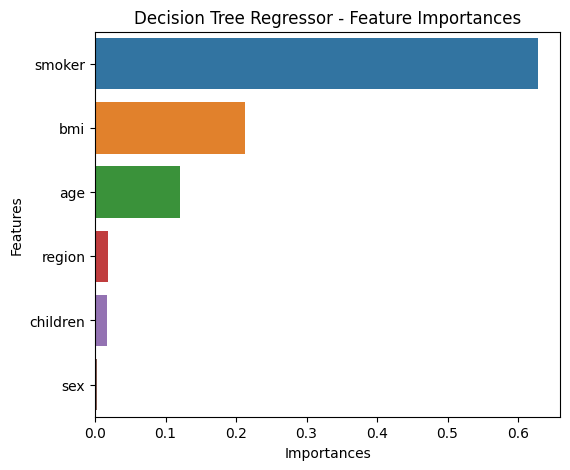

In [29]:
# Get Feature Importances for Decision Tree Regressor

# GEtting importance of features
tree_importances_df = pd.DataFrame(dt.feature_importances_,
                                   columns=["importances"])
# print(tree_importances_df)

# converting features into dataframe
tree_features_df = pd.DataFrame(features,
                                columns=["predictors"])
# print(tree_features_df)


# Concatenating feature importance with features dataframe
feature_importances_tree_df = pd.concat([tree_features_df,
                                         tree_importances_df],
                                        axis=1)
# print(feature_importances_tree_df)


# Sorting features importance with descending order
feature_importances_tree_df = feature_importances_tree_df.sort_values(["importances"],
                                                                      ascending=False)
print(feature_importances_tree_df)


# Bar plot of feature importance
my_plt = sns.barplot(data=feature_importances_tree_df,
                    x="importances",
                    y="predictors",
                    hue="predictors",
                   dodge=False)

plt.xlabel("Importances", axes=my_plt)
plt.ylabel("Features", axes=my_plt)
plt.legend().remove()
plt.title("Decision Tree Regressor - Feature Importances",
          axes=my_plt)

plt.savefig("../plot_tree_importances.png")



## XGBoost

In [30]:
# create a xgboost regressor model
xgb_model = xgb.XGBRegressor(objective="reg:linear",
                             random_state=42)
xgb_model.fit(X_train_insurance_df, y_train_insurance_df)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [31]:
# find out the predictions for the test data
xgb_predictions_df = pd.DataFrame(xgb_model.predict(X_test_insurance_df),
                                  columns=["predicted_charges"])

In [32]:
# create the final data frame with predicted charges
final_xgb_predicted_df = create_final_df(in_x_test_df=X_test_insurance_df,
                                            in_y_test_df=y_test_insurance_df,
                                            pred_df=xgb_predictions_df)



# final predicted values
final_xgb_predicted_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,49,female,29.925,0,no,northwest,8988.15875,10149.033203
1,62,male,26.695,0,yes,northeast,28101.33305,28281.544922
2,57,female,20.100,1,no,southwest,12032.32600,12272.264648
3,22,male,39.500,0,no,southwest,1682.59700,1669.655029
4,18,female,38.665,2,no,northeast,3393.35635,4147.529785
...,...,...,...,...,...,...,...,...
549,19,male,29.070,0,yes,northwest,17352.68030,17341.365234
550,26,male,46.530,1,no,southeast,2927.06470,2944.316650
551,41,male,23.940,1,no,northeast,6858.47960,6809.199219
552,27,female,31.400,0,yes,southwest,34838.87300,34553.839844


In [33]:
# Calculate RMSE and R2 score for XGBoost Regression Model
xgb_mse = mean_squared_error(final_xgb_predicted_df["charges"],
                                final_xgb_predicted_df["predicted_charges"])

xgb_rmse = round(float(np.sqrt(xgb_mse)), 2)


print(f"The RMSE for the XGB  Regression is {xgb_rmse}")
print(f"R2 score: {r2_score(final_xgb_predicted_df['charges'],final_xgb_predicted_df['predicted_charges'])}")

The RMSE for the XGB  Regression is 2824.56
R2 score: 0.9481065344590365


   importances
0     0.018374
1     0.004588
2     0.024485
3     0.007484
4     0.938219
5     0.006850
  predictors  importances
4     smoker     0.938219
2        bmi     0.024485
0        age     0.018374
3   children     0.007484
5     region     0.006850
1        sex     0.004588


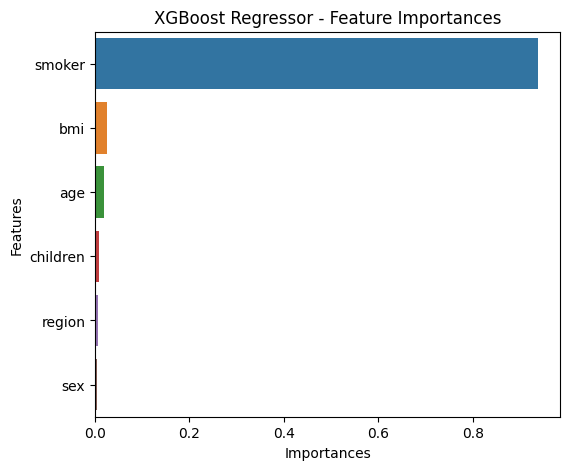

In [34]:
# Get Feature Importances for XGBoost Regressor

xgb_importances_df = pd.DataFrame(xgb_model.feature_importances_,
                                  columns=["importances"])

print(xgb_importances_df)


xgb_features_df = pd.DataFrame(features,
                               columns=["predictors"])
# print(xgb_features_df)

# Feature importance dataframe
feature_importances_xgb_df = pd.concat([xgb_features_df,
                                        xgb_importances_df],
                                       axis=1)


# Sorting
feature_importances_xgb_df = feature_importances_xgb_df.sort_values(["importances"],
                                                                    ascending=False)
print(feature_importances_xgb_df)


# Bar plot
sns.barplot(data=feature_importances_xgb_df,
            x="importances",
            y="predictors",
            hue="predictors",
           dodge=False)


plt.xlabel("Importances")
plt.ylabel("Features")
plt.legend().remove()
plt.title("XGBoost Regressor - Feature Importances")

plt.savefig("../plot_xgb_importances.png")


## Support Vector Machines

In [35]:
# Support Vector Machines Regressor
svm_reg = svm.SVR(kernel="linear")

svm_reg.fit(X_train_insurance_df, y_train_insurance_df)


# find out the predictions for the test data
svr_predictions_df = pd.DataFrame(svm_reg.predict(X_test_insurance_df),
                                  columns=["predicted_charges"])

# create the final data frame with predicted charges
final_svr_predictions_df = create_final_df(in_x_test_df=X_test_insurance_df,
                                            in_y_test_df=y_test_insurance_df,
                                            pred_df=svr_predictions_df)

# final predicted values
final_svr_predictions_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,49,female,29.925,0,no,northwest,8988.15875,9600.290830
1,62,male,26.695,0,yes,northeast,28101.33305,13481.113313
2,57,female,20.100,1,no,southwest,12032.32600,12125.471938
3,22,male,39.500,0,no,southwest,1682.59700,2257.535082
4,18,female,38.665,2,no,northeast,3393.35635,1943.067874
...,...,...,...,...,...,...,...,...
549,19,male,29.070,0,yes,northwest,17352.68030,1972.135753
550,26,male,46.530,1,no,southeast,2927.06470,3623.778957
551,41,male,23.940,1,no,northeast,6858.47960,7750.324587
552,27,female,31.400,0,yes,southwest,34838.87300,4226.458467


In [36]:
# Calculate RMSE  and R2 score for SVM Regression Model
svm_mse = mean_squared_error(final_svr_predictions_df["charges"],
                                final_svr_predictions_df["predicted_charges"])

svm_rmse = round(float(np.sqrt(svm_mse)), 2)


print(f"The RMSE for the SVM  Regression is {svm_rmse}")
print(f"R2 score: {r2_score(final_svr_predictions_df['charges'],final_svr_predictions_df['predicted_charges'])}")

The RMSE for the SVM  Regression is 12793.77
R2 score: -0.06465387750265883


## Elastic Net Regression

In [37]:
# Elastic Net Regression Model
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.7)

elastic_net_model.fit(X_train_insurance_df, y_train_insurance_df)


# find out the predictions for the test data
elastic_net_predictions_df = pd.DataFrame(elastic_net_model.predict(X_test_insurance_df),
                                          columns=["predicted_charges"])

# create the final data frame with predicted charges
final_elastic_net_predictions_df = create_final_df(in_x_test_df=X_test_insurance_df,
                                            in_y_test_df=y_test_insurance_df,
                                            pred_df=elastic_net_predictions_df)

# final predicted values
final_elastic_net_predictions_df


,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,49,female,29.925,0,no,northwest,8988.15875,11880.339196
1,62,male,26.695,0,yes,northeast,28101.33305,27285.830933
2,57,female,20.100,1,no,southwest,12032.32600,11497.116570
3,22,male,39.500,0,no,southwest,1682.59700,8797.224991
4,18,female,38.665,2,no,northeast,3393.35635,8287.994330
...,...,...,...,...,...,...,...,...
549,19,male,29.070,0,yes,northwest,17352.68030,17177.656549
550,26,male,46.530,1,no,southeast,2927.06470,12734.404471
551,41,male,23.940,1,no,northeast,6858.47960,9350.873757
552,27,female,31.400,0,yes,southwest,34838.87300,19622.451541


In [38]:
# Calculate RMSE  and R2 score for Elastic Net Regression Model
elastic_mse = mean_squared_error(final_elastic_net_predictions_df["charges"],
                                final_elastic_net_predictions_df["predicted_charges"])

elastic_rmse = round(float(np.sqrt(elastic_mse)), 2)


print(f"The RMSE for the SVM  Regression is {elastic_rmse}")
print(f"R2 score: {r2_score(final_elastic_net_predictions_df['charges'],final_elastic_net_predictions_df['predicted_charges'])}")

The RMSE for the SVM  Regression is 7830.69
R2 score: 0.6011486317584677


## Random Forest Regressor

In [39]:
RF = RandomForestRegressor(max_depth=15, random_state=42)

RF.fit(X_train_insurance_df, y_train_insurance_df)


# find out the predictions for the test data
rf_predictions_df = pd.DataFrame(RF.predict(X_test_insurance_df),
                                   columns=["predicted_charges"])


# create the final data frame with predicted charges
final_rf_predicted_df = create_final_df(in_x_test_df=X_test_insurance_df,
                                            in_y_test_df=y_test_insurance_df,
                                            pred_df=rf_predictions_df)

# final predicted values
final_rf_predicted_df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,49,female,29.925,0,no,northwest,8988.15875,9165.517345
1,62,male,26.695,0,yes,northeast,28101.33305,28300.936585
2,57,female,20.100,1,no,southwest,12032.32600,12137.347466
3,22,male,39.500,0,no,southwest,1682.59700,1853.690941
4,18,female,38.665,2,no,northeast,3393.35635,3638.606489
...,...,...,...,...,...,...,...,...
549,19,male,29.070,0,yes,northwest,17352.68030,17681.420592
550,26,male,46.530,1,no,southeast,2927.06470,2950.310450
551,41,male,23.940,1,no,northeast,6858.47960,6719.893079
552,27,female,31.400,0,yes,southwest,34838.87300,34773.313157


In [40]:
# Calculate RMSE  and R2 score for Random Forest Regression Model
RF_mse = mean_squared_error(final_rf_predicted_df["charges"],
                                final_rf_predicted_df["predicted_charges"])

RF_rmse = round(float(np.sqrt(RF_mse)), 2)


print(f"The RMSE for the SVM  Regression is {RF_rmse}")
print(f"R2 score: {r2_score(final_rf_predicted_df['charges'],final_rf_predicted_df['predicted_charges'])}")

The RMSE for the SVM  Regression is 2808.39
R2 score: 0.9486990714158642


  predictors  importances
4     smoker     0.625360
2        bmi     0.211989
0        age     0.125265
3   children     0.016657
5     region     0.015849
1        sex     0.004880


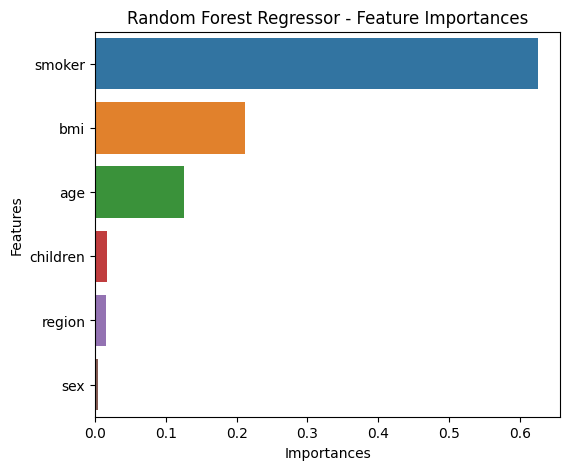

In [41]:
# Get Feature Importances for Random Forest Regressor

rf_importances_df = pd.DataFrame(RF.feature_importances_,
                                   columns=["importances"])


rf_features_df = pd.DataFrame(features,
                                columns=["predictors"])

feature_importances_rf_df = pd.concat([rf_features_df,
                                         rf_importances_df],
                                        axis=1)

feature_importances_rf_df = feature_importances_rf_df.sort_values(["importances"],
                                                                      ascending=False)

print(feature_importances_rf_df)


# Bar Plot
my_plt = sns.barplot(data=feature_importances_rf_df,
                    x="importances",
                    y="predictors",
                    hue="predictors",
                   dodge=False)

plt.xlabel("Importances", axes=my_plt)
plt.ylabel("Features", axes=my_plt)
plt.legend().remove()
plt.title("Random Forest Regressor - Feature Importances",
          axes=my_plt)

plt.savefig("../plot_random_forest_importances.png")

## Accuracy Comparison Plots

The below set of plots compares the accuracy of the 6 models that we have created. We show the below comparison plots

1. RMSE Accuracy Values Plot
2. Predicted Charges Vs Actual Charges Plot - with the ideal line marked in red and dashed
3. The Residuals Plot showing the residuals of each of the 6 models and how they compare.
   
Each of these plots show a consistent information on which of the plots fare the best and which do not.

In [42]:
# Combine the RMSE values into one data for better readability

df_accuracy_results = pd.concat([pd.DataFrame([{"model_type": "Linear Regression",
                                                "rmse_value": linear_rmse}]),
                                 pd.DataFrame([{"model_type": "Decision Tree",
                                                "rmse_value": tree_rmse}]),
                                  pd.DataFrame([{"model_type": "XGBoost",
                                                "rmse_value": xgb_rmse}]),
                                 pd.DataFrame([{"model_type": "SVR",
                                                "rmse_value": svm_rmse}]),
                                 pd.DataFrame([{"model_type": "Elastic Net",
                                                "rmse_value": elastic_rmse}]),
                                 pd.DataFrame([{"model_type": "Random Forest",
                                                "rmse_value": RF_rmse}])], axis=0).reset_index(drop=True)


df_accuracy_results = df_accuracy_results.sort_values(["rmse_value"], ascending=True)

df_accuracy_results

,model_type,rmse_value
1,Decision Tree,2397.42
5,Random Forest,2808.39
2,XGBoost,2824.56
0,Linear Regression,6335.82
4,Elastic Net,7830.69
3,SVR,12793.77


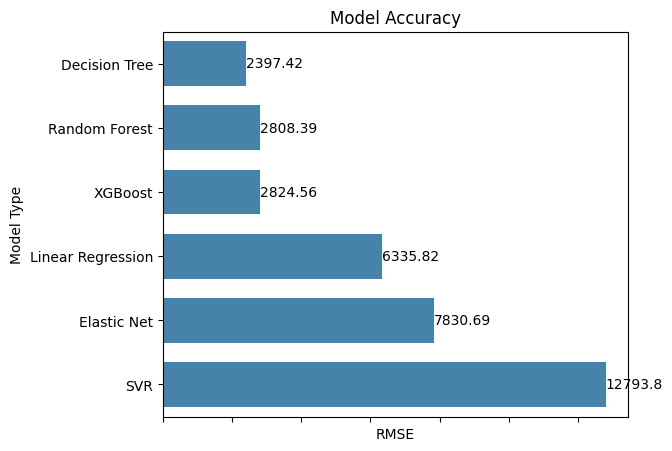

In [43]:
# so finally let's plot the prediction accuracy exhibited by each of the models

my_plt = sns.barplot(data=df_accuracy_results,
            x="rmse_value",
            y="model_type",
             width=0.7,
             dodge=False,
            alpha=0.9)

plt.legend().remove()

my_plt.bar_label(my_plt.containers[0])
plt.xticks(visible=False)
plt.xlabel("RMSE")
plt.ylabel("Model Type")
plt.title("Model Accuracy")

plt.savefig("../plot_accuarcy_comparison.png")


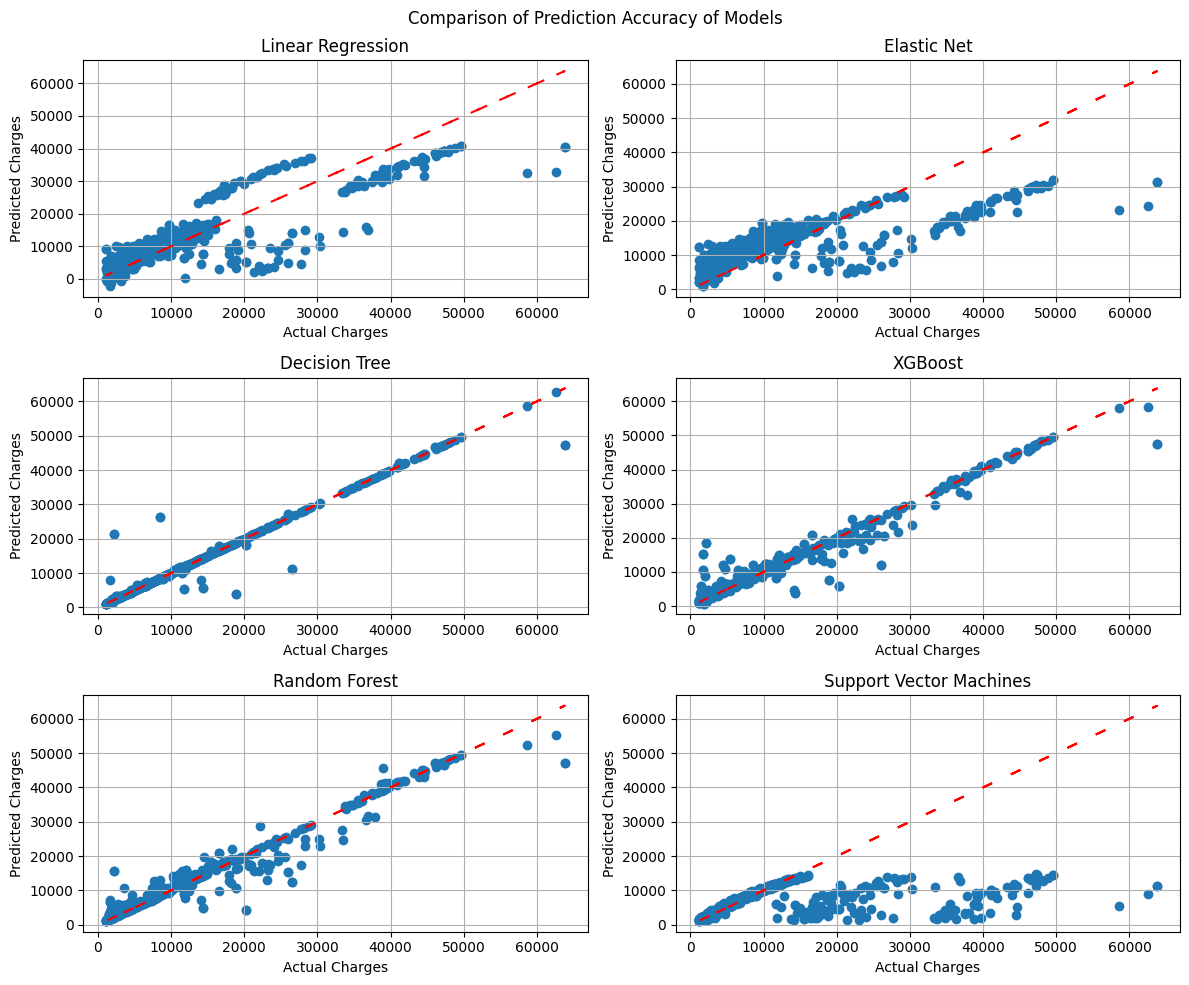

In [44]:
# Comparison of Prediction Accuracy of Models

fig, axs = plt.subplots(nrows=3,
                        ncols=2,
                        figsize=(12, 10))

axs = axs.flatten()

title_list = ["Linear Regression", "Elastic Net", "Decision Tree", "XGBoost", "Random Forest", "Support Vector Machines"]


# note the use of parametrized linestyle for loosely dashed (0, (5, 10))

for i in range(len(axs)):
    if i == 0:
        axs[i].scatter(final_linear_predicted_df["charges"],
                       final_linear_predicted_df["predicted_charges"])
        axs[i].plot(final_linear_predicted_df["charges"],
                    final_linear_predicted_df["charges"],
                    linestyle=(0, (5,10)),
                    color="red")

    elif i == 1:
        axs[i].scatter(final_elastic_net_predictions_df["charges"],
                       final_elastic_net_predictions_df["predicted_charges"])
        axs[i].plot(final_elastic_net_predictions_df["charges"],
                    final_elastic_net_predictions_df["charges"],
                    linestyle=(0, (5,10)),
                    color="red")

    elif i == 2:
        axs[i].scatter(final_tree_predicted_df["charges"],
                       final_tree_predicted_df["predicted_charges"])
        axs[i].plot(final_tree_predicted_df["charges"],
                    final_tree_predicted_df["charges"],
                    linestyle=(0, (5,10)),
                    color="red")

    elif i == 3:
        axs[i].scatter(final_xgb_predicted_df["charges"],
                       final_xgb_predicted_df["predicted_charges"])
        axs[i].plot(final_xgb_predicted_df["charges"],
                    final_xgb_predicted_df["charges"],
                    linestyle=(0, (5,10)),
                    color="red")

    elif i == 4:
        axs[i].scatter(final_rf_predicted_df["charges"],
                       final_rf_predicted_df["predicted_charges"])
        axs[i].plot(final_rf_predicted_df["charges"],
                    final_rf_predicted_df["charges"],
                    linestyle=(0, (5,10)),
                    color="red")

    elif i == 5:
        axs[i].scatter(final_svr_predictions_df["charges"],
                       final_svr_predictions_df["predicted_charges"])
        axs[i].plot(final_svr_predictions_df["charges"],
                    final_svr_predictions_df["charges"],
                    linestyle=(0, (5,10)),
                    color="red")

    axs[i].set_title(title_list[i])
    axs[i].grid(True)
    axs[i].set_xlabel("Actual Charges")
    axs[i].set_ylabel("Predicted Charges")


fig.suptitle("Comparison of Prediction Accuracy of Models")
plt.tight_layout()

plt.savefig("../compare_models.png")


As we can see from the above figure where the actual charges are plotted on the x axis and the predicted charges are plotted on the y axis for every model that we have built and red line in each plot indicates our desired accuracy where the predicted charges exactly match the actual charge. The Decision Tree predicted charges falls mostly on the red line and Random Forest, XGBoost also have their predicted charges closely following the red line meaning that these two models produce the best accuracy on the test data set. Linear Regression and Elastic Net are not doing as good as them and the support vector regressor is doing extremely badly.

     age     sex     bmi  children smoker     region      charges  \
0     49  female  29.925         0     no  northwest   8988.15875   
1     62    male  26.695         0    yes  northeast  28101.33305   
2     57  female  20.100         1     no  southwest  12032.32600   
3     22    male  39.500         0     no  southwest   1682.59700   
4     18  female  38.665         2     no  northeast   3393.35635   
..   ...     ...     ...       ...    ...        ...          ...   
549   19    male  29.070         0    yes  northwest  17352.68030   
550   26    male  46.530         1     no  southeast   2927.06470   
551   41    male  23.940         1     no  northeast   6858.47960   
552   27  female  31.400         0    yes  southwest  34838.87300   
553   41  female  31.600         0     no  southwest   6186.12700   

     predicted_charges     residuals  
0         11880.339196   2892.180446  
1         27285.830933   -815.502117  
2         11497.116570   -535.209430  
3          8797

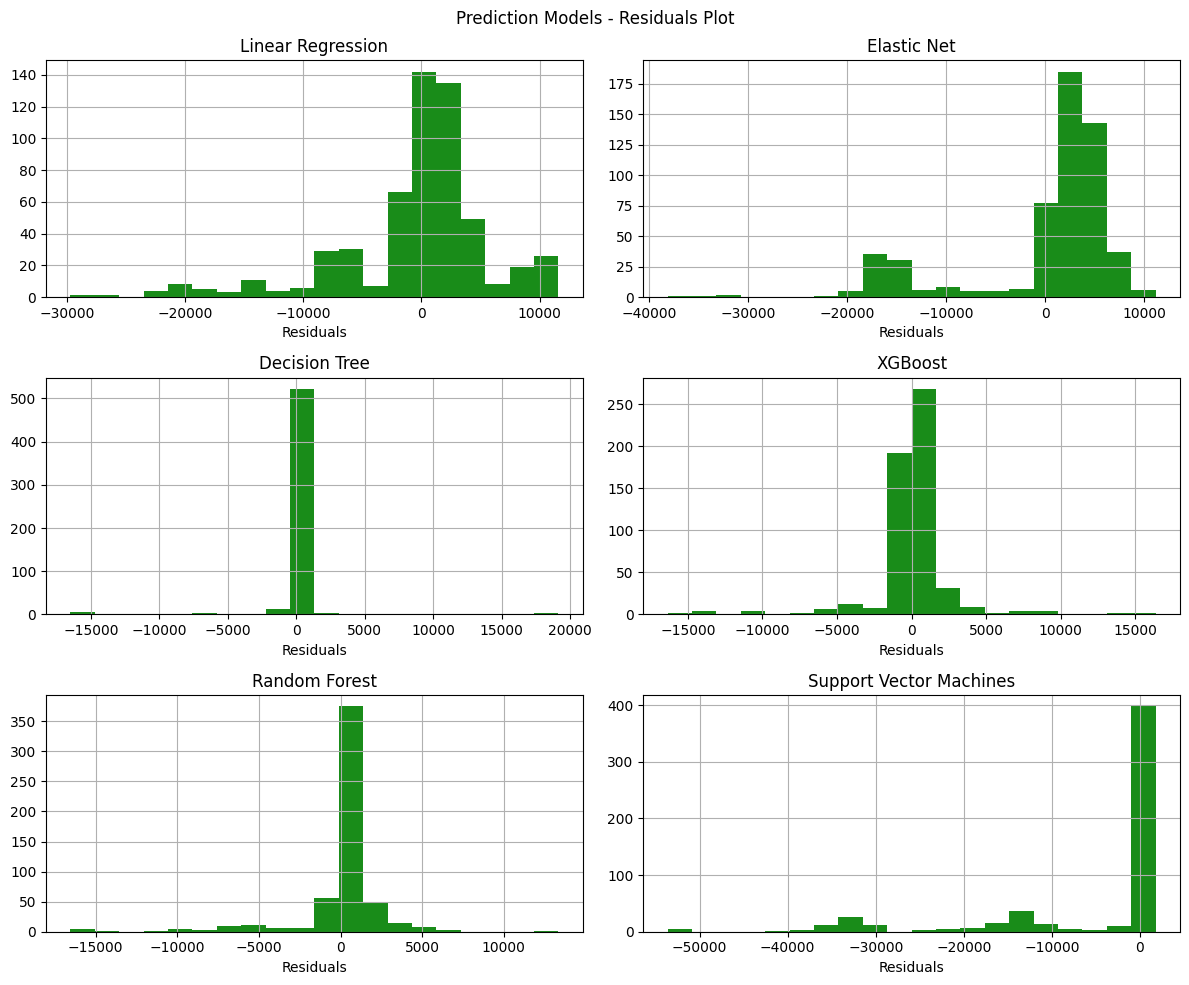

In [45]:
final_linear_predicted_df["residuals"] = final_linear_predicted_df["predicted_charges"] - final_linear_predicted_df["charges"]
# print(final_linear_predicted_df)

# use of assign to create new columns in a dataframe

final_elastic_net_predictions_df = final_elastic_net_predictions_df.assign(residuals = final_elastic_net_predictions_df["predicted_charges"] - final_elastic_net_predictions_df["charges"])
final_tree_predicted_df = final_tree_predicted_df.assign(residuals = final_tree_predicted_df["predicted_charges"] - final_tree_predicted_df["charges"])
final_xgb_predicted_df = final_xgb_predicted_df.assign(residuals = final_xgb_predicted_df["predicted_charges"] - final_xgb_predicted_df["charges"])
final_rf_predicted_df = final_rf_predicted_df.assign(residuals = final_rf_predicted_df["predicted_charges"] - final_rf_predicted_df["charges"])
final_svr_predictions_df = final_svr_predictions_df.assign(residuals = final_svr_predictions_df["predicted_charges"] - final_svr_predictions_df["charges"])

print(final_elastic_net_predictions_df)


fig, axs = plt.subplots(nrows=3,
                        ncols=2,
                        figsize=(12, 10),
                        tight_layout=True)

axs = axs.flatten()

n_bins = 20

title_list = ["Linear Regression", "Elastic Net", "Decision Tree", "XGBoost", "Random Forest", "Support Vector Machines"]


for i in range(len(axs)):
    if i == 0:
        axs[i].hist(final_linear_predicted_df["residuals"], bins=n_bins, color="green", alpha=0.9)
        axs[i].set_xlabel("Residuals")
    elif i == 1:
        axs[i].hist(final_elastic_net_predictions_df["residuals"], bins=n_bins, color="green", alpha=0.9)
        axs[i].set_xlabel("Residuals")
    elif i == 2:
        axs[i].hist(final_tree_predicted_df["residuals"], bins=n_bins, color="green", alpha=0.9)
        axs[i].set_xlabel("Residuals")
    elif i == 3:
        axs[i].hist(final_xgb_predicted_df["residuals"], bins=n_bins, color="green", alpha=0.9)
        axs[i].set_xlabel("Residuals")
    elif i == 4:
        axs[i].hist(final_rf_predicted_df["residuals"], bins=n_bins, color="green", alpha=0.9)
        axs[i].set_xlabel("Residuals")
    elif i == 5:
        axs[i].hist(final_svr_predictions_df["residuals"], bins=n_bins, color="green", alpha=0.9)
        axs[i].set_xlabel("Residuals")


    axs[i].set_title(title_list[i])
    axs[i].grid(True)
    axs[i].set_xlabel("Residuals")


fig.suptitle("Prediction Models - Residuals Plot")
plt.savefig("../compare_residuals.png")


The residuals plot is also quite interesting. Decision Tree followed by random forest show the least residuals with Decision Tree residuals mostly being zero and hence is the best performing model.

# 4. Conclusion

So we have now seen how a Predictive Modeling workflow looks like. We also found that smoker status unanimously impacts the cost of insurance the most with age and bmi also being the other critical determining factors. In the process we also have developed 6 predictive models with the Decision Tree having the lowest RMSE (best performing model on this test data) closely followed by Random Forest, XGBoost, Linear Regression and Elastic Net and finally with the SVR having the highest RMSE (as the worst performing model).



In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_insurance_df, y_train_insurance_df)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(grid_search.best_estimator_, X_test_insurance_df, y_test_insurance_df, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -scores)
print("Mean:", -np.mean(scores), "| Std Dev:", np.std(scores))


Cross-validated RMSE: [6926.52042092 6606.54219387 5203.73179111 5696.90393059 5517.49024524]
Mean: 5990.237716346072 | Std Dev: 660.9966661998527


   importances
0     0.120154
1     0.005399
2     0.209125
3     0.016877
4     0.628145
5     0.020299
  predictors
0        age
1        sex
2        bmi
3   children
4     smoker
5     region
  predictors  importances
4     smoker     0.628145
2        bmi     0.209125
0        age     0.120154
5     region     0.020299
3   children     0.016877
1        sex     0.005399


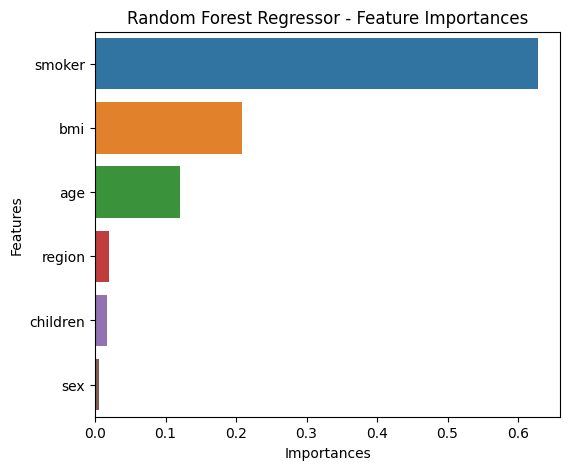

In [48]:
import matplotlib.pyplot as plt

importances_df = pd.DataFrame(grid_search.best_estimator_.feature_importances_,columns=["importances"])

print(importances_df)


features_df = pd.DataFrame(features, columns=["predictors"])

print(features_df)

grid_search_df = pd.concat([features_df,
                                         importances_df],
                                        axis=1)

grid_search_df = grid_search_df.sort_values(["importances"],ascending=False)

print(grid_search_df)

# Bar Plot
my_plt = sns.barplot(data=grid_search_df,
                    x="importances",
                    y="predictors",
                    hue="predictors",
                   dodge=False)

plt.xlabel("Importances", axes=my_plt)
plt.ylabel("Features", axes=my_plt)
plt.legend().remove()
plt.title("Random Forest Regressor - Feature Importances",
          axes=my_plt)

plt.savefig("../plot_random_forest_importances.png")

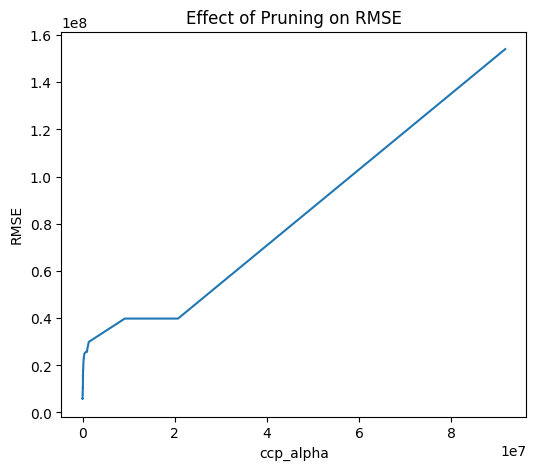

In [49]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train_insurance_df, y_train_insurance_df)
ccp_alphas = path.ccp_alphas

rmses = []
for alpha in ccp_alphas:
    dt = DecisionTreeRegressor(ccp_alpha=alpha)
    dt.fit(X_train_insurance_df, y_train_insurance_df)
    preds = dt.predict(X_test_insurance_df)
    rmse = mean_squared_error(y_test_insurance_df, preds)
    rmses.append(rmse)

plt.plot(ccp_alphas, rmses)
plt.xlabel("ccp_alpha")
plt.ylabel("RMSE")
plt.title("Effect of Pruning on RMSE")
plt.show()


In [50]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ce9dcb7232189f7c83a48e9bacd36f833e4ca7e45220aac8f83529a32b2571f4
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
